In [ ]:
# To do
+ find a way to create hour variable
+ plot variables alone (count) and vs gravity
+ find a way to plot proportions by group
+ fill template

In [74]:
time = pd.DataFrame(data={'a':['1200', '1845', '00:31']})
time

,a
0,1200
1,1845
2,00:31


In [80]:
[i.replace(":", "") for i in time['a']]

['1200', '1845', '0031']

In [85]:
dfCarac['hrmn'].replace(':', '')
# [i.replace(":", "") for i in dfCarac['hrmn']]

0           1445
1           1800
2           1900
3           1930
4           1100
           ...  
1065048    07:50
1065049    17:00
1065050    10:00
1065051    11:45
1065052    17:44
Name: hrmn, Length: 1065053, dtype: object

# Session

In [8]:
# install modules
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [1]:
# import modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill

%matplotlib inline

In [2]:
##### Defining directory
os.chdir('C:\\Users\\Megaport\\20220814_projectDS')
os.chdir('C:\\Users\\Megaport\\Desktop\\jupyterNotebook')
os.getcwd()

'C:\\Users\\Megaport\\Desktop\\jupyterNotebook'

In [3]:
# import session
dill.load_session('notebook_env.db')

In [59]:
# save session
dill.dump_session('notebook_env.db')

# Import

In [7]:
##### Import of tables into dataframes
dfLieux = pd.read_csv('20220817_table_lieux.csv', sep=',')
dfUsagers = pd.read_csv('20220814_table_usagers.csv', sep=',')
dfVehicules = pd.read_csv('20220817_table_vehicules.csv', sep=',')
dfCarac = pd.read_csv('20220817_table_caracteristiques.csv', sep=',')

##### Merging of tables into 1 pooled dataframe
# dfPool = pd.merge(dfLieux, dfUsagers, dfVehicules, dfCarac, on="Num_Acc")

C:\Users\Megaport\AppData\Local\Temp\ipykernel_9552\890290328.py:2: DtypeWarning: Columns (4,9,10,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfLieux = pd.read_csv('20220817_table_lieux.csv', sep=',')
C:\Users\Megaport\AppData\Local\Temp\ipykernel_9552\890290328.py:3: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dfUsagers = pd.read_csv('20220814_table_usagers.csv', sep=',')
C:\Users\Megaport\AppData\Local\Temp\ipykernel_9552\890290328.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  dfVehicules = pd.read_csv('20220817_table_vehicules.csv', sep=',')
C:\Users\Megaport\AppData\Local\Temp\ipykernel_9552\890290328.py:5: DtypeWarning: Columns (6,12,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfCarac = pd.read_csv('20220817_table_caracteristiques.csv', sep=',')


In [11]:
print('dfLieux dimensions:', dfLieux.shape)
print('dfUsagers dimensions:', dfUsagers.shape)
print('dfVehicules dimensions:', dfVehicules.shape)
print('dfCarac dimensions:', dfCarac.shape)
# print('dfPool dimensions:', dfPool.shape)

dfLieux dimensions: (1065053, 22)
dfUsagers dimensions: (2380467, 17)
dfVehicules dimensions: (1817587, 14)
dfCarac dimensions: (1065053, 19)


# Data-management

In [33]:
# Computing date variable
dfCarac['date'] = dfCarac['jour'].astype(str) + '-' + dfCarac['mois'].astype(str) + '-' + dfCarac['an'].astype(str)
dfCarac['date'] = pd.to_datetime(dfCarac['date']);

# Computing months with categorical labels
dfCarac['mois_label'] = dfCarac['mois']
dfCarac['mois_label'] = dfCarac['mois_label'].replace(to_replace=np.arange(1, 13, 1), 
                                                      value=['jan', 'fev', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])

# Days of the week
dfCarac['weekday'] = dfCarac['date'].dt.weekday

# Hour of the day
dfCarac['hour'] = dfCarac['hrmn']//100

C:\Users\Megaport\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '30-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Megaport\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Megaport\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29-11-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Megaport\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-11-2019' in DD/MM/YYYY format. Provide form

TypeError: unsupported operand type(s) for //: 'str' and 'int'

In [13]:
dfCarac['date'].value_counts().sort_index()

2005-01-01    180
2005-01-02    209
2005-01-03    185
2005-01-04    289
2005-01-05    241
             ... 
2020-12-27     55
2020-12-28    109
2020-12-29     86
2020-12-30    119
2020-12-31     94
Name: date, Length: 5844, dtype: int64

In [48]:

dfCarac['hrmn'].value_counts()


1800     14553
1730     13029
1700     12932
1830     12520
1900     11422
         ...  
1413         1
1854         1
3            1
717          1
00:31        1
Name: hrmn, Length: 3721, dtype: int64

# Descriptive statistics
### Mapping of variables
In this section, we describe each table

In [12]:
dfCarac.head(3)

,Unnamed: 0.1,Unnamed: 0,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,grav
0,0,0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0.0,590,3
1,1,1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimetière,M,0.0,0.0,590,3
2,2,2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0.0,590,3


In [58]:
print('Jours:', len(dfCarac.jour.value_counts()))
print('Mois:', len(dfCarac.mois.value_counts()))
print('An:', len(dfCarac.an.value_counts()))
print('hrmn:', len(dfCarac.hrmn.value_counts()))
print('lum:', len(dfCarac.lum.value_counts()))
print('atm:', len(dfCarac.atm.value_counts()))
print('col:', len(dfCarac.col.value_counts()))
print('agg:', len(dfCarac['agg'].value_counts()))
print(dfCarac.an.value_counts())
print(dfCarac.lum.value_counts())
print(dfCarac.atm.value_counts())
print(dfCarac.col.value_counts())
print(dfCarac.hrmn.value_counts())
print(dfCarac['agg'].value_counts())

Jours: 31
Mois: 12
An: 16
hrmn: 3721
lum: 6
atm: 10
col: 8
agg: 2
5       87026
7       83850
6       82993
8       76767
9       74409
10      69379
11      66974
12      62250
17      60701
14      59854
16      59432
2019    58840
15      58654
13      58397
18      57783
2020    47744
Name: an, dtype: int64
 1    727047
 5    177299
 3     87688
 2     64056
 4      8958
-1         5
Name: lum, dtype: int64
 1.0    859398
 2.0    112118
 8.0     35361
 3.0     23140
 7.0     11683
 9.0      7470
 5.0      6997
 4.0      6108
 6.0      2692
-1.0        13
Name: atm, dtype: int64
 6.0    349947
 3.0    307035
 2.0    125194
 7.0    109515
 1.0    103866
 5.0     34109
 4.0     33851
-1.0      1517
Name: col, dtype: int64
1800     14553
1730     13029
1700     12932
1830     12520
1900     11422
         ...  
1413         1
1854         1
3            1
717          1
00:31        1
Name: hrmn, Length: 3721, dtype: int64
2    720478
1    344575
Name: agg, dtype: int64


In [37]:
dfCarac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065053 entries, 0 to 1065052
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1065053 non-null  int64  
 1   Unnamed: 0    1065053 non-null  int64  
 2   Num_Acc       1065053 non-null  int64  
 3   an            1065053 non-null  int64  
 4   mois          1065053 non-null  int64  
 5   jour          1065053 non-null  int64  
 6   hrmn          1065053 non-null  object 
 7   lum           1065053 non-null  int64  
 8   agg           1065053 non-null  int64  
 9   int           1065053 non-null  int64  
 10  atm           1064980 non-null  float64
 11  col           1065034 non-null  float64
 12  com           1065051 non-null  object 
 13  adr           922350 non-null   object 
 14  gps           480052 non-null   object 
 15  lat           577985 non-null   object 
 16  long          577981 non-null   object 
 17  dep           1065053 non-n

In [22]:
### Proportion of NA
dfCarac.isnull().sum() * 100 / len(dfCarac)

Unnamed: 0.1     0.000000
Unnamed: 0       0.000000
Num_Acc          0.000000
an               0.000000
mois             0.000000
jour             0.000000
hrmn             0.000000
lum              0.000000
agg              0.000000
int              0.000000
atm              0.006854
col              0.001784
com              0.000188
adr             13.398676
gps             54.926938
lat             45.731809
long            45.732184
dep              0.000000
grav             0.000000
dtype: float64

In [13]:
dfLieux.head(3)

,Unnamed: 0.1,Unnamed: 0,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,...,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma,grav
0,0,0,201600000001,3.0,39,NaN,NaN,2.0,0.0,NaN,...,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,3
1,1,1,201600000002,3.0,39,NaN,NaN,1.0,0.0,NaN,...,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0,NaN,3
2,2,2,201600000003,3.0,1,NaN,NaN,2.0,2.0,NaN,...,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0,NaN,3


In [38]:
dfLieux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065053 entries, 0 to 1065052
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Unnamed: 0.1  1065053 non-null  int64  
 1   Unnamed: 0    1065053 non-null  int64  
 2   Num_Acc       1065053 non-null  int64  
 3   catr          1065052 non-null  float64
 4   voie          960441 non-null   object 
 5   v1            429229 non-null   float64
 6   v2            46379 non-null    object 
 7   circ          1063479 non-null  float64
 8   nbv           1062322 non-null  float64
 9   pr            589569 non-null   object 
 10  pr1           587750 non-null   object 
 11  vosp          1062292 non-null  float64
 12  prof          1063104 non-null  float64
 13  plan          1062772 non-null  float64
 14  lartpc        902631 non-null   object 
 15  larrout       952212 non-null   object 
 16  surf          1063129 non-null  float64
 17  infra         1059645 non-n

In [23]:
### Proportion of NA
dfLieux.isnull().sum() * 100 / len(dfLieux)

Unnamed: 0.1     0.000000
Unnamed: 0       0.000000
Num_Acc          0.000000
catr             0.000094
voie             9.822234
v1              59.698813
v2              95.645381
circ             0.147786
nbv              0.256419
pr              44.644163
pr1             44.814953
vosp             0.259236
prof             0.182996
plan             0.214168
lartpc          15.250133
larrout         10.594872
surf             0.180648
infra            0.507768
situ             0.466643
env1            10.518162
vma             89.992611
grav             0.000000
dtype: float64

In [39]:
dfLieux[['nbv', 'vosp', 'prof', 'pr', 'pr1', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'env1']].describe()

,nbv,vosp,prof,plan,surf,infra,situ,env1
count,1.062322e+06,1.062292e+06,1.063104e+06,1.062772e+06,1.063129e+06,1.059645e+06,1.060083e+06,953029.000000
mean,2.099984e+00,1.342983e-01,1.155437e+00,1.210787e+00,1.260633e+00,4.799305e-01,1.224638e+00,38.230840
std,1.516156e+00,5.621275e-01,6.102975e-01,7.209365e-01,9.412922e-01,1.466913e+00,8.621112e-01,48.059472
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000
25%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000
50%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000
75%,2.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,99.000000
max,9.900000e+01,3.000000e+00,4.000000e+00,4.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,99.000000


In [6]:
print('nbv:', len(dfLieux.nbv.value_counts()))
print('vosp:', len(dfLieux.vosp.value_counts()))
print('prof:', len(dfLieux.vosp.value_counts()))
print('plan:', len(dfLieux.plan.value_counts()))
print('pr:', len(dfLieux.pr.value_counts()))
print('pr1:', len(dfLieux.pr1.value_counts()))
print('lartpc:', len(dfLieux.lartpc.value_counts()))
print('larrout:', len(dfLieux.larrout.value_counts()))
print('surf:', len(dfLieux.surf.value_counts()))
print('infra:', len(dfLieux.infra.value_counts()))
print('situ:', len(dfLieux.situ.value_counts()))
print('env1:', len(dfLieux.env1.value_counts()))
print('hrmn:', len(dfLieux.larrout.value_counts()))
print(dfLieux.vosp.value_counts())
print(dfLieux.pr.value_counts())
print(dfLieux.pr1.value_counts())
print(dfLieux.lartpc.value_counts())
print(dfLieux.env1.value_counts())
print(dfLieux.larrout.value_counts())

nbv: 54
vosp: 5
prof: 5
plan: 6
pr: 1472
pr1: 3733
lartpc: 451
larrout: 692
surf: 11
infra: 11
situ: 9
env1: 3
hrmn: 692
 0.0    992708
 3.0     30159
 1.0     23819
 2.0     14658
-1.0       948
Name: vosp, dtype: int64
0.0       147496
0          45931
1.0        34908
2.0        16806
(1)        15682
           ...  
2850.0         1
750.0          1
487.0          1
47.6           1
509            1
Name: pr, Length: 1472, dtype: int64
0.0       195153
0          49461
500.0      29176
200.0      17624
800.0      16829
           ...  
7807.0         1
2890.0         1
2870.0         1
7960.0         1
661            1
Name: pr1, Length: 3733, dtype: int64
0.0      758829
15.0      34024
10.0      19766
20.0      16768
30.0       8575
          ...  
490.0         1
241.0         1
356.0         1
388.0         1
2,8           1
Name: lartpc, Length: 451, dtype: int64
0.0     541532
99.0    366673
3.0      44824
Name: env1, dtype: int64
0.0      287708
60.0      76204
70.0      61

In [14]:
dfUsagers.head(3)

,Unnamed: 0,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3
0,0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02,NaN,NaN,NaN,NaN
1,1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01,NaN,NaN,NaN,NaN
2,2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01,NaN,NaN,NaN,NaN


In [28]:
dfVehicules.head(3)

,Unnamed: 0.1,Unnamed: 0,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor,grav
0,0,0,201600000001,0.0,7,0.0,0.0,0.0,1.0,1.0,B02,NaN,NaN,3
1,1,1,201600000001,0.0,2,0.0,0.0,0.0,7.0,15.0,A01,NaN,NaN,3
2,2,2,201600000002,0.0,7,0.0,6.0,0.0,1.0,1.0,A01,NaN,NaN,3


### Graphs
##### Time-related graphs

C:\Users\Megaport\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


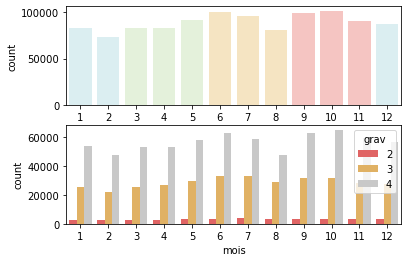

In [56]:
fig, ax = plt.subplots(2, 1)
sns.countplot(dfCarac['mois'], 
             palette=['#D7F1F5', '#D7F1F5', 
                   '#E3F5D7', '#E3F5D7', '#E3F5D7', 
                   '#FEE7B9', '#FEE7B9', '#FEE7B9', 
                   '#FEBEB9', '#FEBEB9', '#FEBEB9', 
                   '#D7F1F5'], ax=ax[0])
sns.countplot(x=dfCarac['mois'], hue=dfCarac['grav'], 
             palette=['#F45050','#F4B650','#C8C8C8'], ax=ax[1]);

C:\Users\Megaport\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


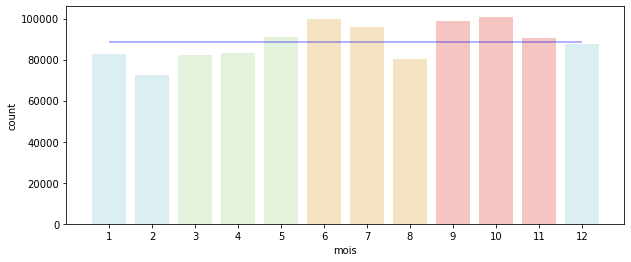

In [87]:
plt.figure(figsize=(10, 4))
sns.countplot(dfCarac['mois'], 
             palette=['#D7F1F5', '#D7F1F5', 
                   '#E3F5D7', '#E3F5D7', '#E3F5D7', 
                   '#FEE7B9', '#FEE7B9', '#FEE7B9', 
                   '#FEBEB9', '#FEBEB9', '#FEBEB9', 
                   '#D7F1F5'])
plt.hlines(y=len(dfCarac['mois'])/12, xmin=0, xmax=11, color='blue', alpha=0.4);
# On peut observer que les mois de juin, juillet, septembre et octobre semblent avoir le plus d'accidents
# On peut observer que le mois de février compte le moins d'accidents mais il comporte aussi 28 jours

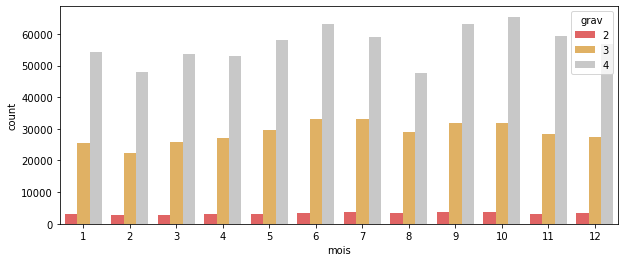

In [93]:
plt.figure(figsize=(10, 4))
sns.countplot(x=dfCarac['mois'], hue=dfCarac['grav'], 
             palette=['#F45050','#F4B650','#C8C8C8']);

# Faire un graphique où on affiche la proportion de gravité par mois
# idem par heures du jour (24h au total)

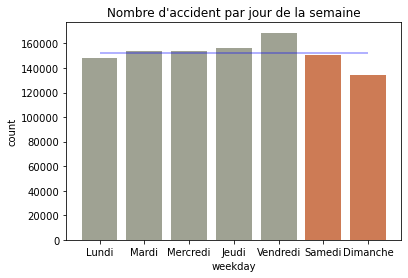

In [31]:
sns.countplot(x=dfCarac['weekday'], 
             palette=['#A0A491', '#A0A491', '#A0A491', '#A0A491', '#A0A491', '#E17441', '#E17441'])
plt.hlines(y=len(dfCarac['weekday'])/7, xmin=0, xmax=6, color='blue', alpha=0.4);
plt.xticks(np.arange(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'])
plt.title("Nombre d'accident par jour de la semaine");

# It seems that the friday is the accident day

In [127]:
pd.crosstab(dfCarac['weekday'], dfCarac['grav'], normalize=0)

grav,2,3,4
weekday,,,
0,0.034321,0.316216,0.649463
1,0.033581,0.315638,0.650782
2,0.033740,0.316447,0.649813
3,0.035775,0.316973,0.647253
4,0.035893,0.321393,0.642714
5,0.040665,0.340721,0.618614
6,0.041431,0.343555,0.615015


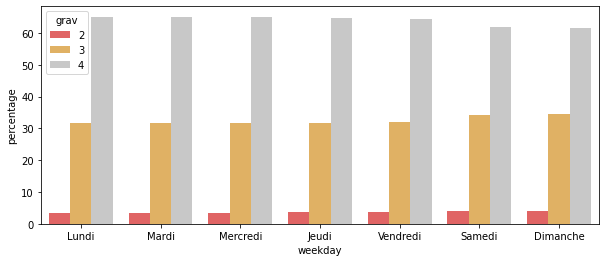

In [142]:
# Initiating dataframe grouped by weekday
dfCaracGpByWeekday = (dfCarac.groupby(['weekday'])['grav']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('grav'))

# Display plotx
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x="weekday", y="percentage", hue="grav", data=dfCaracGpByWeekday, 
             palette=['#F45050','#F4B650','#C8C8C8'])
ax.set_xticklabels(['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']);
# It seems that the gravity of accident is larger during the weekend compared to the week

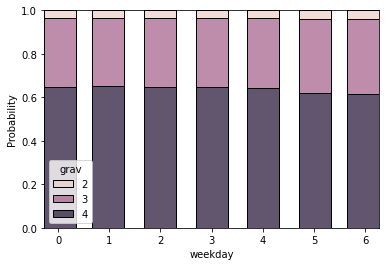

In [146]:
sns.histplot(dfCarac, x="weekday", hue="grav", stat="probability", multiple="fill", shrink=8);

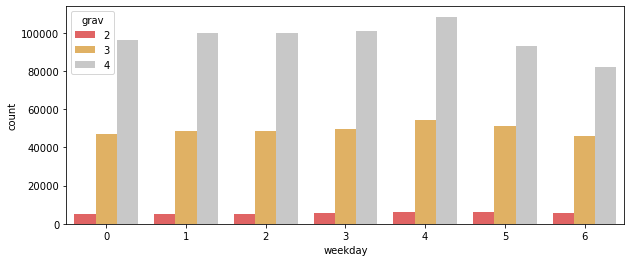

In [32]:
plt.figure(figsize=(10, 4))
sns.countplot(x=dfCarac['weekday'], hue=dfCarac['grav'], 
             palette=['#F45050','#F4B650','#C8C8C8']);

In [ ]:
sns.countplot(x=dfCarac['hour'])
plt.xticks([0, 6, 12, 18, 24], ['Minuit', '6h', 'Midi', '18h', 'Minuit'])
plt.title("Nombre d'accident par heure de la journée");

In [89]:
dfCarac['hrmn']

0           1445
1           1800
2           1900
3           1930
4           1100
           ...  
1065048    07:50
1065049    17:00
1065050    10:00
1065051    11:45
1065052    17:44
Name: hrmn, Length: 1065053, dtype: object

In [5]:
dfLieux.grav.value_counts()

4    681231
3    345073
2     38749
Name: grav, dtype: int64